In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

Import the cleaned solar measurement data from the three countries

#### Import the Cleaned Solar Measurement Data

This block loads the cleaned solar irradiance datasets for Benin, Sierra Leone, and Togo from CSV files. These datasets are used for all subsequent analyses and visualizations.

In [ ]:
# Load datasets
df_benin = pd.read_csv("../../data/benin-cleaned.csv")
df_sierra = pd.read_csv("../../data/sierraleone-cleaned.csv")
df_togo = pd.read_csv("../../data/togo-cleaned.csv")

#### Combine Datasets with Labels

This block adds a `Country` label to each dataset and concatenates them into a single DataFrame. This combined dataset enables direct comparison of solar metrics across the three countries.

In [ ]:
# Combine datasets with labels
df_benin["Country"] = "Benin"
df_sierra["Country"] = "Sierra Leone"
df_togo["Country"] = "Togo"
df_combined = pd.concat([df_benin, df_sierra, df_togo])

### Boxplots Comparing Solar Metrics Across Countries

 Visualize and compare the spread, central tendency, and outliers of solar irradiance metrics for each country.
 Quickly identify differences in solar resource availability and variability between Benin, Sierra Leone, and Togo.

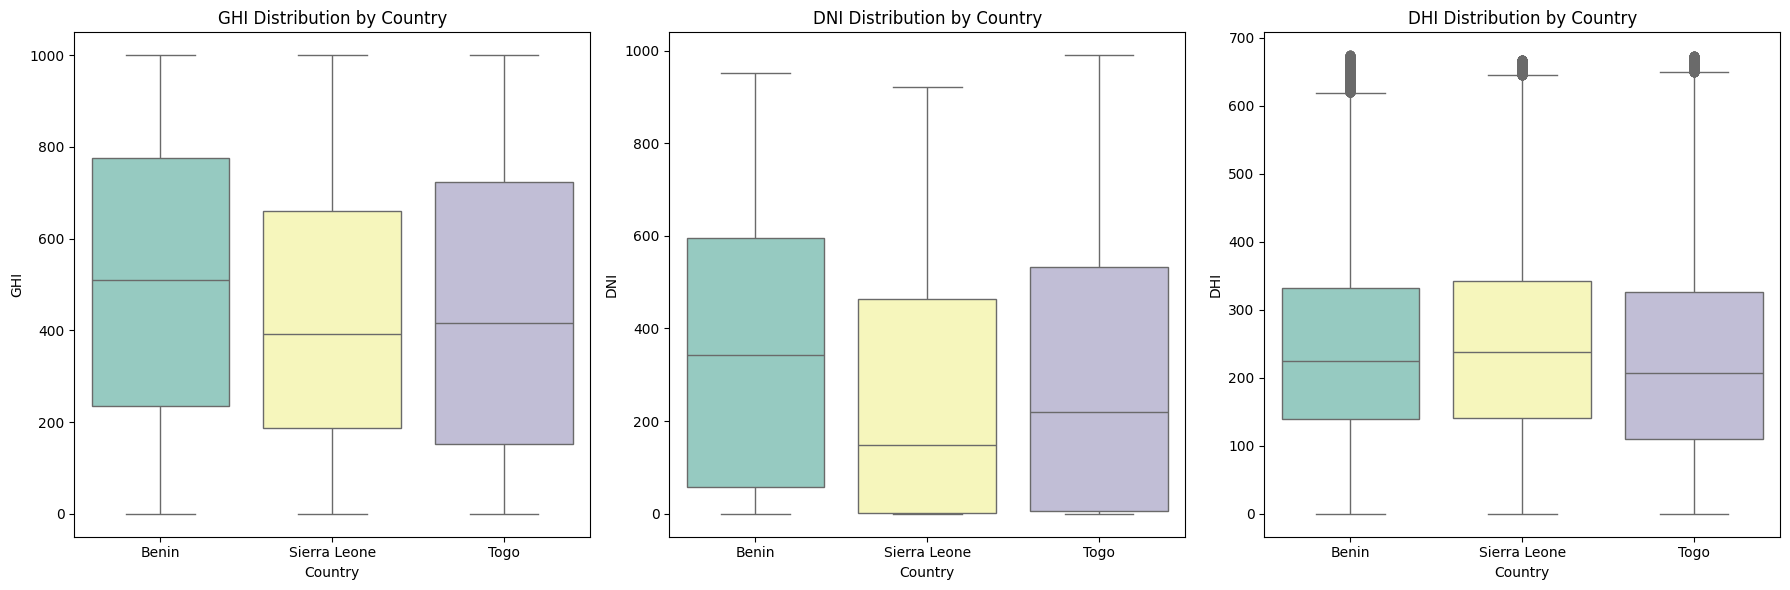

In [ ]:
# List of metrics to compare
metrics = ["GHI", "DNI", "DHI"]

# Create one boxplot per metric, colored by country
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(x="Country", y=metric, hue="Country", data=df_combined, palette="Set3", legend=False, ax=axes[i])
    axes[i].set_title(f"{metric} Distribution by Country")
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel(metric)
plt.tight_layout()
plt.show()

### Summary Statistics for Solar Metrics by Country
The following code block calculates and displays summary statistics for key solar irradiance metrics (**GHI**, **DNI**, **DHI**) for each country (Benin, Sierra Leone, and Togo). The statistics include the mean, median, and standard deviation for each metric, allowing for a quantitative comparison of solar resource characteristics across the three countries.

In [16]:
# Compare key metrics: Mean, Median, Std Dev
summary_stats = pd.DataFrame({
    "Country": ["Benin", "Sierra Leone", "Togo"],
    "Mean GHI": [df_benin["GHI"].mean(), df_sierra["GHI"].mean(), df_togo["GHI"].mean()],
    "Mean DNI": [df_benin["DNI"].mean(), df_sierra["DNI"].mean(), df_togo["DNI"].mean()],
    "Mean DHI": [df_benin["DHI"].mean(), df_sierra["DHI"].mean(), df_togo["DHI"].mean()],
    "Median GHI": [df_benin["GHI"].median(), df_sierra["GHI"].median(), df_togo["GHI"].median()],
    "Median DNI": [df_benin["DNI"].median(), df_sierra["DNI"].median(), df_togo["DNI"].median()],
    "Median DHI": [df_benin["DHI"].median(), df_sierra["DHI"].median(), df_togo["DHI"].median()],
    "Std Dev GHI": [df_benin["GHI"].std(), df_sierra["GHI"].std(), df_togo["GHI"].std()],
    "Std Dev DNI": [df_benin["DNI"].std(), df_sierra["DNI"].std(), df_togo["DNI"].std()],
    "Std Dev DHI": [df_benin["DHI"].std(), df_sierra["DHI"].std(), df_togo["DHI"].std()],

})
summary_stats

,Country,Mean GHI,Mean DNI,Mean DHI,Median GHI,Median DNI,Median DHI,Std Dev GHI,Std Dev DNI,Std Dev DHI
0,Benin,502.578219,349.886822,244.913480,509.1,341.8,225.2,297.421666,277.417060,142.395042
1,Sierra Leone,426.558880,243.453704,246.806973,392.5,149.2,237.8,276.767607,254.347283,138.906150
2,Togo,440.268000,287.250492,224.987224,416.9,220.2,207.4,308.310860,279.070991,148.623479


### ANOVA Test

This section statistically compares the mean GHI (Global Horizontal Irradiance) values across the three countries: **Benin**, **Sierra Leone**, and **Togo**.

The code performs a one-way ANOVA test to determine whether there are significant differences in the average GHI between the countries. The resulting p-value is printed and interpreted as follows:

- If the **p-value is less than 0.05**, it suggests that at least one country's mean GHI is significantly different from the others.
- If the **p-value is greater than 0.05**, it suggests there is no statistically significant difference in mean GHI between the countries.

In [26]:
f_statistic, p_value = f_oneway(df_benin["GHI"], df_sierra["GHI"], df_togo["GHI"])
print(f"P-value: {p_value}")

P-value: 0.0


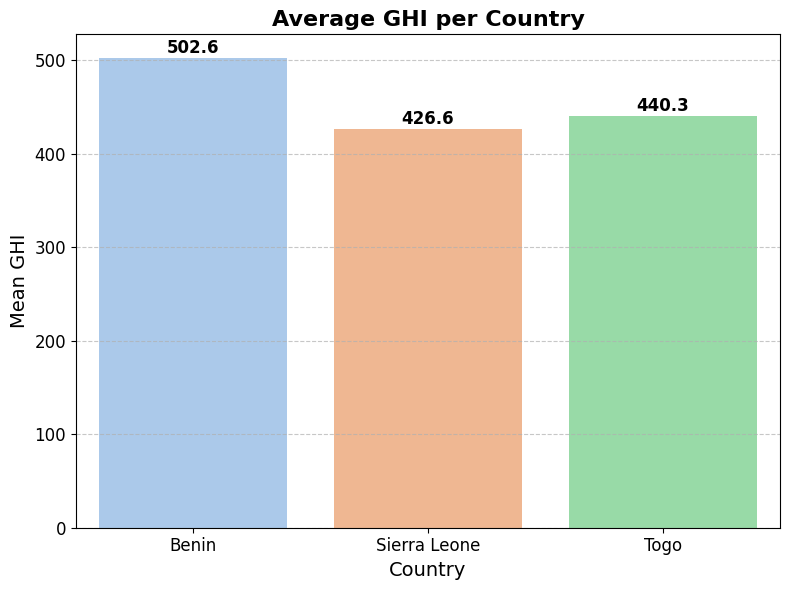

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Country", 
    y="Mean GHI", 
    data=summary_stats, 
    hue="Country",
    legend=False,
    palette="pastel", 
)
plt.title("Average GHI per Country", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Mean GHI", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(summary_stats["Mean GHI"]):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()